# <center> The Relax Challenge </center>

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from datetime import timedelta
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df2 = pd.read_csv(r'C:\Users\owner\Desktop\WM2\relax_challenge\takehome_user_engagement.csv')
df2.head(7)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
print('Number of users {} and Total number of logins {}'.format(df2['user_id'].nunique(), len(df2)))

Number of users 8823 and Total number of logins 207917


In [5]:
# CHECKING FOR MISSING VALUES
df2.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [6]:
# SPLITTING THE TIMESTAMP INTO DATES AND TIME
df2['dates'] = pd.to_datetime(df2['time_stamp']).dt.date
df2['time'] = pd.to_datetime(df2['time_stamp']).dt.time

In [7]:
df2.head(6)

,time_stamp,user_id,visited,dates,time
0,2014-04-22 03:53:30,1,1,2014-04-22,03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15,03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29,03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09,03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25,03:45:04
5,2013-12-31 03:45:04,2,1,2013-12-31,03:45:04


In [8]:
df2.shape

(207917, 5)

In [9]:
#time_stamp_user_id_visited = df2[["time_stamp", "user_id", "visited"]]
#time_stamp_user_id_visited

In [10]:
# Lets convert time_stamp into dattime format
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [11]:
# Define a function to check whether a user logged in on 3 separate days in a 7-day period
def logins_in_days(df, days = 7, logins = 3):
    # Remove any duplicat days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset = 'date').sort_values('date')
    passed_days = df['date'].diff(periods = logins - 1)
    # Check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days = days))

In [12]:
# Apply above function on all users
adopted = df2.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [13]:
print('Number of {} adopted users out of {} users'.format(sum(adopted), len(adopted)))

Number of 1656 adopted users out of 8823 users


In [14]:
df2.isnull().sum()

time_stamp    0
user_id       0
visited       0
dates         0
time          0
dtype: int64

In [15]:
df3 = pd.read_csv(r"C:\Users\owner\Desktop\WM2\relax_challenge\takehome_users.csv", encoding="ISO-8859-1")
df3.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [16]:
df3.shape

(12000, 10)

In [17]:
df3.name.value_counts()

Cavalcanti Victor    5
Araujo Gabriela      5
Cunha Melissa        4
Azevedo Bruna        4
Costa Alice          4
                    ..
Dresner Phillipp     1
Meagher Charles      1
Eriksen Morten       1
Johansen Bent        1
Roth Kevin           1
Name: name, Length: 11355, dtype: int64

In [18]:
df3.email.value_counts()

MimirMKarlsen@jourrapide.com     2
KerstinNeudorf@gmail.com         2
MandySchroder@gustr.com          2
LeonieDuerr@gmail.com            2
MagnusSWinther@jourrapide.com    2
                                ..
MadeleineParkes@gmail.com        1
BaileyHarvey@cuvox.de            1
SylviaWMitchell@gmail.com        1
BenjaminMakinson@yahoo.com       1
ManuelaKuefer@gmail.com          1
Name: email, Length: 11980, dtype: int64

<AxesSubplot:ylabel='Frequency'>

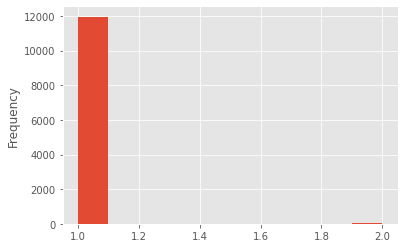

In [19]:
df3.email.value_counts().plot.hist()

<AxesSubplot:ylabel='Frequency'>

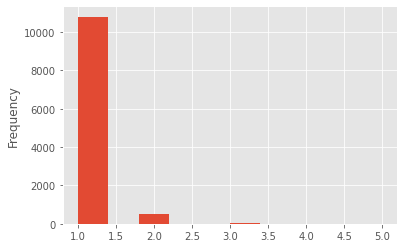

In [20]:
df3.name.value_counts().plot.hist()

In [21]:
df3['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

<AxesSubplot:ylabel='Frequency'>

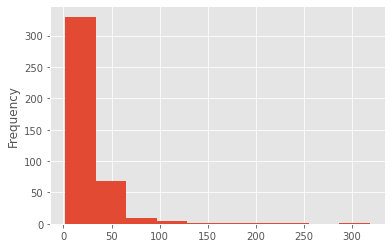

In [22]:
df3.org_id.value_counts().plot.hist()

In [23]:
df3["opted_in_to_mailing_list"].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

<AxesSubplot:>

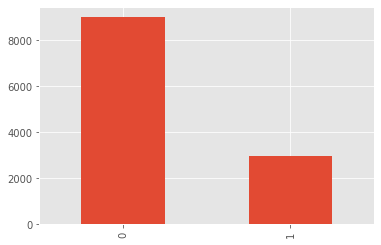

In [24]:
df3["opted_in_to_mailing_list"].value_counts().plot.bar()

In [25]:
df3['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

<AxesSubplot:>

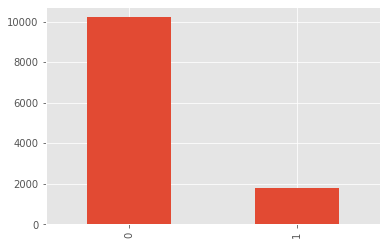

In [26]:
df3['enabled_for_marketing_drip'].value_counts().plot.bar()

In [27]:
df3['invited_by_user_id'].value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

<AxesSubplot:ylabel='Frequency'>

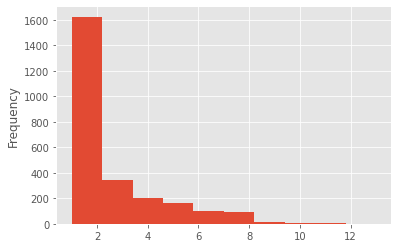

In [28]:
df3['invited_by_user_id'].value_counts().plot.hist()

(array([466., 556., 557., 571., 560., 517., 533., 589., 574., 505., 505.,
        484.]),
 array([3.00000000e+00, 1.00266667e+03, 2.00233333e+03, 3.00200000e+03,
        4.00166667e+03, 5.00133333e+03, 6.00100000e+03, 7.00066667e+03,
        8.00033333e+03, 9.00000000e+03, 9.99966667e+03, 1.09993333e+04,
        1.19990000e+04]),
 <BarContainer object of 12 artists>)

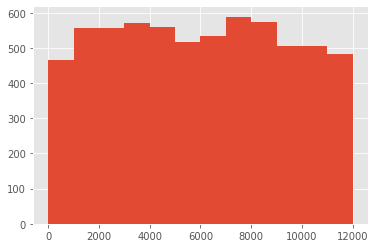

In [29]:
plt.hist(df3['invited_by_user_id'], bins = 12)

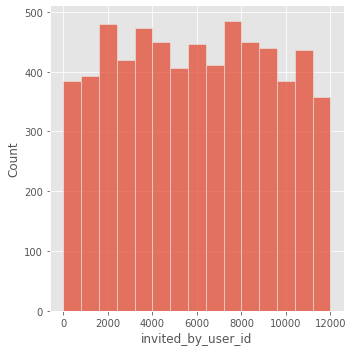

In [30]:
import seaborn as sns
sns.displot(df3['invited_by_user_id'], bins = 15)

In [31]:
df3.columns, df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


(Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
       dtype='object'),
 None)

In [32]:
df3.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [33]:
df3.invited_by_user_id.dtypes

dtype('float64')

In [34]:
df3['last_session_creation_time'] = df3['last_session_creation_time'].fillna(df3['last_session_creation_time'].median())
df3['invited_by_user_id'] = df3['invited_by_user_id'].fillna(df3['invited_by_user_id'].median())

In [35]:
df3.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [36]:
df3['last_session_creation_time'] = pd.to_datetime(df3['last_session_creation_time'], unit = 's')

In [37]:
# Lets drop 4 attributes - org_id, invited_by_user_id, name, email.
df3 = df3.drop(['org_id', 'invited_by_user_id', 'name', 'email'], axis = 1)

In [38]:
df3.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0


In [39]:
# convert the creation_time and last_session_creation_time to TimeStamp
df3['creation_time'] = pd.to_datetime(df3.creation_time)
df3['last_session_creation_time'] = pd.to_datetime(df3.last_session_creation_time)
# We create  user history attribute
df3['history'] = df3.last_session_creation_time - df3.creation_time
df3['history'] = df3.history.dt.days

# Determine age of account that is the number of days between account creation and present. Recent date in creation_time is used
recent = max(df3.creation_time)
df3['age_of_account'] = recent - df3.creation_time
df3['age_of_account'] = df3.age_of_account.dt.days

#We can remove the two colums ie creation_time and last_session_creation_time
df3 = df3.drop(['creation_time', 'last_session_creation_time'], axis = 1)

In [40]:
df3.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,age_of_account
0,1,GUEST_INVITE,1,0,0,38
1,2,ORG_INVITE,0,0,136,196
2,3,ORG_INVITE,0,0,0,437
3,4,GUEST_INVITE,0,0,1,374
4,5,GUEST_INVITE,0,0,5,498


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   object_id                   12000 non-null  int64 
 1   creation_source             12000 non-null  object
 2   opted_in_to_mailing_list    12000 non-null  int64 
 3   enabled_for_marketing_drip  12000 non-null  int64 
 4   history                     12000 non-null  int64 
 5   age_of_account              12000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 562.6+ KB


In [42]:
# Lets merge df3 data and adopted users varaiable
df3 = df3.set_index('object_id')
df3.index.name = 'user_id'
relax = pd.concat([df3, adopted], axis = 1, join = 'inner')
relax['adopted_user'] = relax['adopted_user'].astype(int)

In [43]:
relax.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,age_of_account,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,0,38,0
2,ORG_INVITE,0,0,136,196,1
3,ORG_INVITE,0,0,0,437,0
4,GUEST_INVITE,0,0,1,374,0
5,GUEST_INVITE,0,0,5,498,0


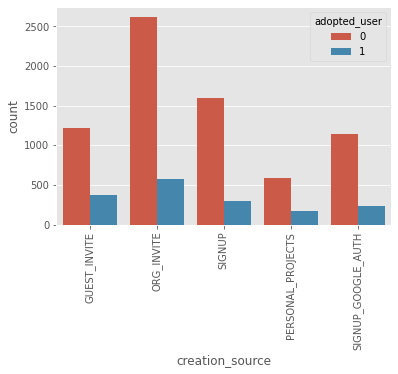

In [44]:
# creation_source and adopted_user
_ = sns.countplot(x = 'creation_source', data = relax, hue = 'adopted_user')
_ = plt.xticks(rotation = 90)

In [45]:
# To boost creation source, we apply chi2 test
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(relax['creation_source'], relax['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 41.27933208242451	p = 2.3526508745340972e-08


In [46]:
# Lets verify the chi2 test significance
relax.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.232368
ORG_INVITE            0.180050
PERSONAL_PROJECTS     0.225131
SIGNUP                0.159115
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted_user, dtype: float64

<AxesSubplot:xlabel='creation_source'>

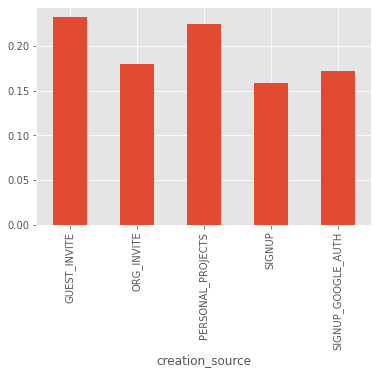

In [47]:
relax.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x)).plot.bar()

In [48]:
# Checking opted_in_to_mailing_list
relax.groupby('opted_in_to_mailing_list')['adopted_user'].apply(lambda x: sum(x)/len(x))

opted_in_to_mailing_list
0    0.185994
1    0.192722
Name: adopted_user, dtype: float64

<AxesSubplot:xlabel='opted_in_to_mailing_list'>

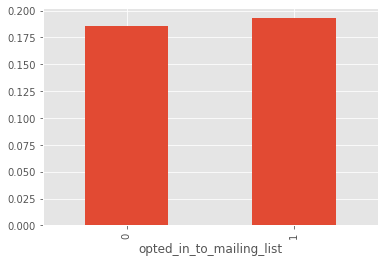

In [49]:
# Checking opted_in_to_mailing_list
relax.groupby('opted_in_to_mailing_list')['adopted_user'].apply(lambda x: sum(x)/len(x)).plot.bar()

In [50]:
# A function to calculate the z-tes for opt_in_to_mailing_list
def z_test(df,col, target = 'adopted_user'):
    from statsmodels.stats.weightstats import CompareMeans
    opted_in = df.loc[relax[col] == 1, target]
    opted_out = df.loc[relax[col] == 0, target]
    z_relax = CompareMeans.from_data(opted_in, opted_out)
    z,p = CompareMeans.ztest_ind(z_relax)
    print('For the {}, z = {}, p = {}'.format(col, z,p))
z_test(relax, 'opted_in_to_mailing_list')

For the opted_in_to_mailing_list, z = 0.7029779128148219, p = 0.4820695142048773


In [51]:
relax.groupby('enabled_for_marketing_drip')['adopted_user'].apply(lambda x: sum(x)/len(x))

enabled_for_marketing_drip
0    0.186982
1    0.191648
Name: adopted_user, dtype: float64

<AxesSubplot:xlabel='enabled_for_marketing_drip'>

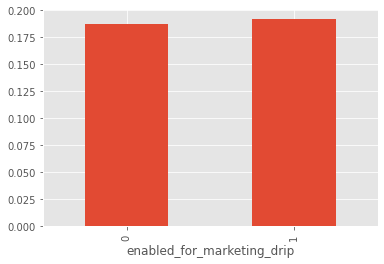

In [52]:
relax.groupby('enabled_for_marketing_drip')['adopted_user'].apply(lambda x: sum(x)/len(x)).plot.bar()

In [53]:
z_test(relax, 'enabled_for_marketing_drip')

For the enabled_for_marketing_drip, z = 0.40292649500940364, p = 0.6870022995069647


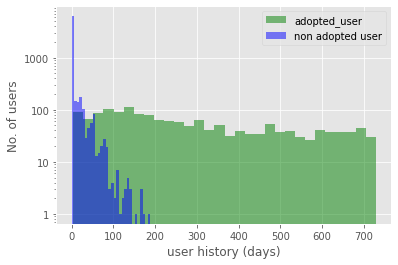

In [54]:
# We consider user history and adopted user
def plot_hist_days(df,col, xlabel):
    _ = plt.hist(df.loc[relax['adopted_user'] == 1, col], bins = 30, alpha = 0.5, color = 'g', label = 'adopted_user')
    _ = plt.hist(df.loc[relax['adopted_user'] == 0, col], bins = 30, alpha = 0.5, color = 'b', label = 'non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1,10,100,1000], ['1','10','100','1000'])
plot_hist_days(relax, 'history', 'user history (days)')

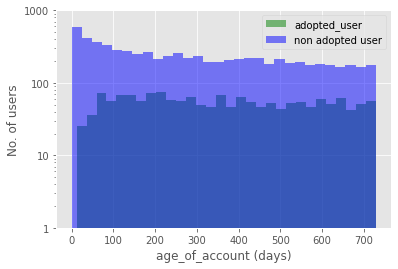

In [55]:
plot_hist_days(relax, 'age_of_account', 'age_of_account (days)')

## MODELING

In [56]:
# FIRST CONVERT creation_source TO DUMMY VARIABLE
creation_source = pd.get_dummies(relax.creation_source, drop_first = True)
model_relax = pd.concat([relax, creation_source], axis = 1).drop('creation_source', axis = 1)
y = model_relax['adopted_user']
X = model_relax.drop('adopted_user', axis = 1)

# DATASET TRAINING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [57]:
# USING xgboost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
params = {'objective': 'binary:hinge', 'missing': 1, 'seed': 42
         }

In [58]:
# Instantiate the XGBOOST Classifier
clf = XGBClassifier(**params)
clf.fit(X_train, y_train)

# Prediction with the XGBoost Classifier
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\owner\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [59]:
# Metric evaluation
import sklearn.metrics as metrics
actual_y = y_test
predicted_y = y_pred

print(metrics.classification_report(actual_y, predicted_y))
print(metrics.confusion_matrix(actual_y, predicted_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.87      0.86      0.86       414

    accuracy                           0.95      2206
   macro avg       0.92      0.91      0.92      2206
weighted avg       0.95      0.95      0.95      2206

[[1739   53]
 [  60  354]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

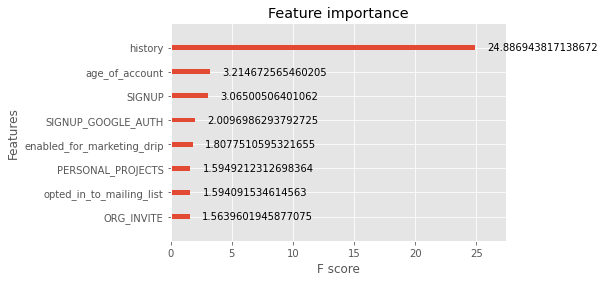

In [60]:
# Determine the feature importance
import xgboost as xgb
xgb.plot_importance(clf, importance_type = 'gain')

### In this prediction model, the most important feature is history which has f score of 24.9 meaning that it contributed more than any other features. This was followed by age_of_account with f score of 3.07.